In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
data = pd.read_excel('data pembelian istow.xlsx', sheet_name='Sheet5')

In [ ]:
df = data
# Mendefinisikan fungsi untuk labeling
def label_binary(column, labels):
    return column.map({0: labels[0], 1: labels[1]})

# Melabeli variabel biner
df['Pembelian'] = label_binary(df['Pembelian'], ['Tidak Membeli', 'Membeli'])
df['kelas kapal'] = label_binary(df['kelas kapal'], ['Non BKI', 'BKI'])
df['Peyaran Internasional'] = label_binary(df['Peyaran Internasional'], ['Domestik', 'Internasional'])

print(df)

        Pembelian  Total aset (milion $)  jumlah kapal kelas kapal  \
0   Tidak Membeli                 4101.0            83     Non BKI   
1   Tidak Membeli                 4101.0            83     Non BKI   
2   Tidak Membeli                 4101.0            83         BKI   
3   Tidak Membeli                 4101.0            83     Non BKI   
4   Tidak Membeli                 4101.0            83         BKI   
5   Tidak Membeli                 4101.0            83         BKI   
6   Tidak Membeli                 4101.0            83         BKI   
7   Tidak Membeli                 4101.0            83         BKI   
8   Tidak Membeli                  910.2            38         BKI   
9   Tidak Membeli                  910.2            38         BKI   
10  Tidak Membeli                  910.2            38         BKI   
11  Tidak Membeli                  910.2            38         BKI   
12  Tidak Membeli                  910.2            38         BKI   
13  Tidak Membeli   

Confusion Matrix:
[[3 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4


Accuracy Score:
0.75


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


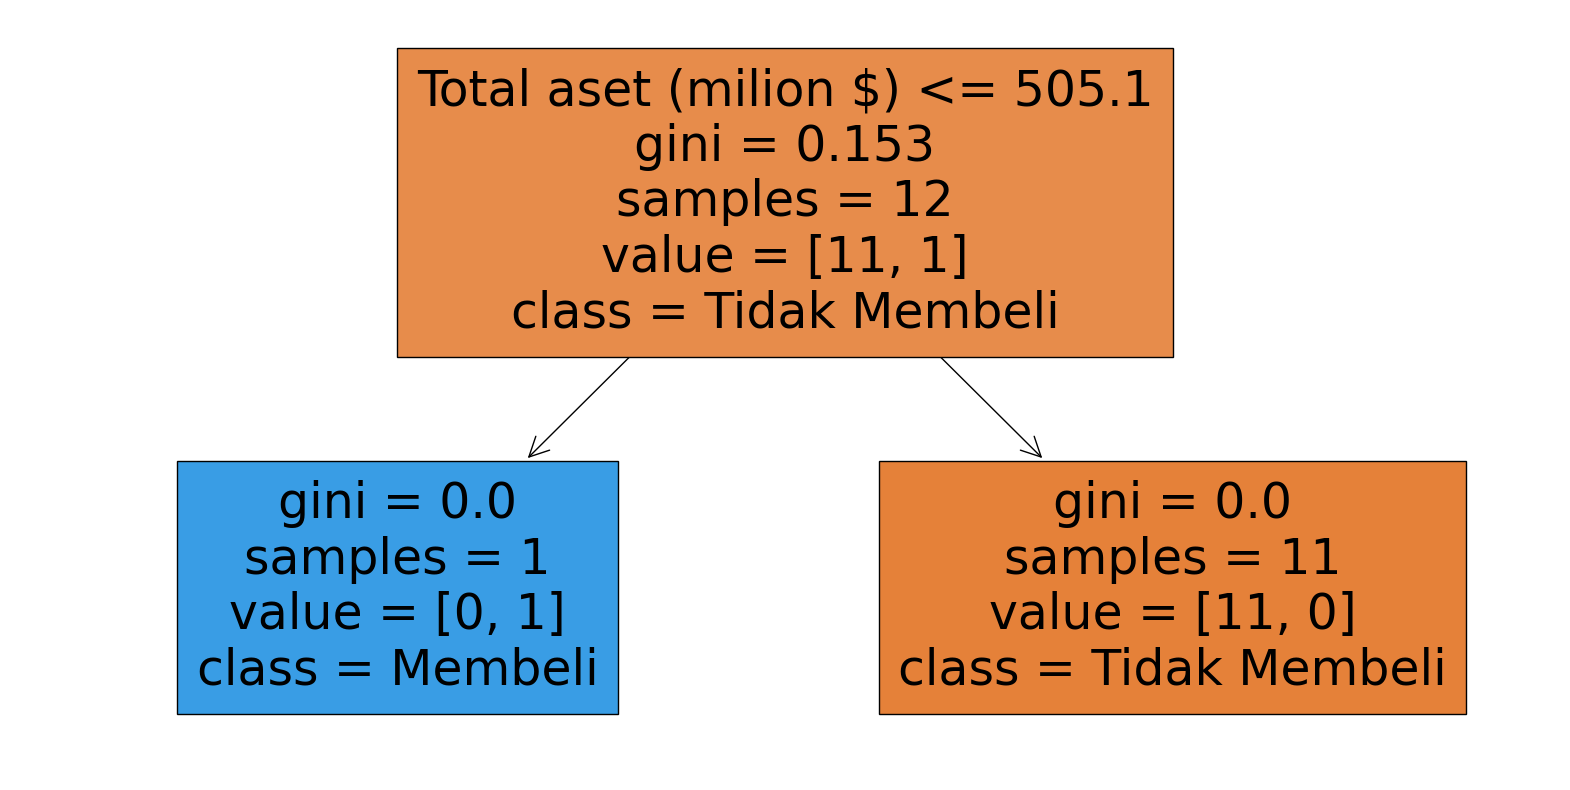

In [ ]:
# Membuat DataFrame
df = pd.DataFrame(data)

# Memisahkan fitur (X) dan target (y)
X = df.drop('Pembelian', axis=1)
y = df['Pembelian']

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Memprediksi
y_pred = model.predict(X_test)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=['Tidak Membeli', 'Membeli'], filled=True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Membuat DataFrame dari data yang diberikan
data = {
    'Pembelian': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    'Total aset (milion $)': [4101, 4101, 4101, 4101, 4101, 4101, 4101, 4101, 910.2, 910.2, 910.2, 910.2, 910.2, 910.2, 1200, 100],
    'jumlah kapal': [83, 83, 83, 83, 83, 83, 83, 83, 38, 38, 38, 38, 38, 38, 78, 20],
    'kelas kapal': [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    'Peyaran Internasional': [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
}

df = pd.DataFrame(data)

# Mendefinisikan fungsi untuk labeling
def label_binary(column, labels):
    return column.map({0: labels[0], 1: labels[1]})

# Melabeli variabel biner
df['Pembelian'] = label_binary(df['Pembelian'], ['Tidak Membeli', 'Membeli'])
df['kelas kapal'] = label_binary(df['kelas kapal'], ['Kelas Biasa', 'Kelas Premium'])
df['Peyaran Internasional'] = label_binary(df['Peyaran Internasional'], ['Domestik', 'Internasional'])

# Encode the target variable 'Pembelian' and other binary variables
le_pembelian = LabelEncoder()
le_kelas_kapal = LabelEncoder()
le_peyaran_internasional = LabelEncoder()

df['Pembelian'] = le_pembelian.fit_transform(df['Pembelian'])
df['kelas kapal'] = le_kelas_kapal.fit_transform(df['kelas kapal'])
df['Peyaran Internasional'] = le_peyaran_internasional.fit_transform(df['Peyaran Internasional'])

# Features and target variable
X = df.drop('Pembelian', axis=1)
y = df['Pembelian']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Decode the predicted and true values for better interpretation
y_test_labels = le_pembelian.inverse_transform(y_test)
y_pred_labels = le_pembelian.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
class_report = classification_report(y_test_labels, y_pred_labels)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)



Accuracy: 0.8
Confusion Matrix:
[[0 1]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

      Membeli       0.00      0.00      0.00         1
Tidak Membeli       0.80      1.00      0.89         4

     accuracy                           0.80         5
    macro avg       0.40      0.50      0.44         5
 weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8
Confusion Matrix:
[[0 1]
 [0 4]]
Classification Report:
               precision    recall  f1-score   support

      Membeli       0.00      0.00      0.00         1
Tidak Membeli       0.80      1.00      0.89         4

     accuracy                           0.80         5
    macro avg       0.40      0.50      0.44         5
 weighted avg       0.64      0.80      0.71         5



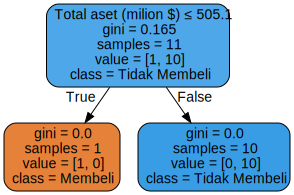

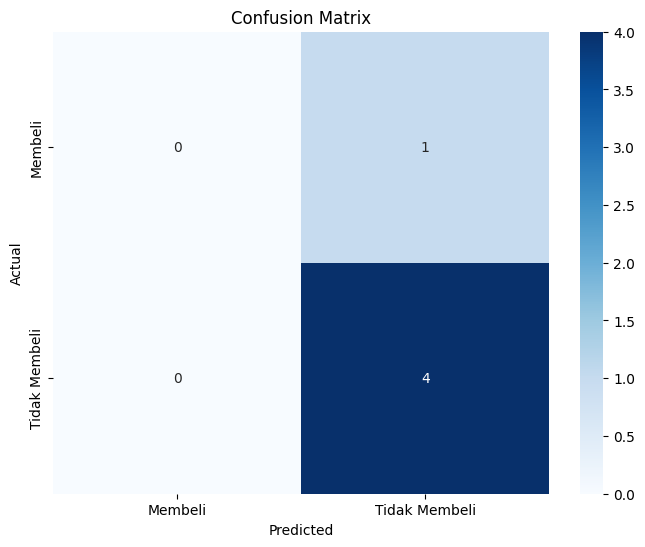

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import tree

# Membuat DataFrame dari data yang diberikan
data = {
    'Pembelian': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    'Total aset (milion $)': [4101, 4101, 4101, 4101, 4101, 4101, 4101, 4101, 910.2, 910.2, 910.2, 910.2, 910.2, 910.2, 1200, 100],
    'jumlah kapal': [83, 83, 83, 83, 83, 83, 83, 83, 38, 38, 38, 38, 38, 38, 78, 20],
    'kelas kapal': [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    'Peyaran Internasional': [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
}

df = pd.DataFrame(data)

# Mendefinisikan fungsi untuk labeling
def label_binary(column, labels):
    return column.map({0: labels[0], 1: labels[1]})

# Melabeli variabel biner
df['Pembelian'] = label_binary(df['Pembelian'], ['Tidak Membeli', 'Membeli'])
df['kelas kapal'] = label_binary(df['kelas kapal'], ['Kelas Biasa', 'Kelas Premium'])
df['Peyaran Internasional'] = label_binary(df['Peyaran Internasional'], ['Domestik', 'Internasional'])

# Encode the target variable 'Pembelian' and other binary variables
le_pembelian = LabelEncoder()
le_kelas_kapal = LabelEncoder()
le_peyaran_internasional = LabelEncoder()

df['Pembelian'] = le_pembelian.fit_transform(df['Pembelian'])
df['kelas kapal'] = le_kelas_kapal.fit_transform(df['kelas kapal'])
df['Peyaran Internasional'] = le_peyaran_internasional.fit_transform(df['Peyaran Internasional'])

# Features and target variable
X = df.drop('Pembelian', axis=1)
y = df['Pembelian']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Decode the predicted and true values for better interpretation
y_test_labels = le_pembelian.inverse_transform(y_test)
y_pred_labels = le_pembelian.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test_labels, y_pred_labels)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
class_report = classification_report(y_test_labels, y_pred_labels)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualisasi Decision Tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=le_pembelian.classes_,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
display(graph)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le_pembelian.classes_, yticklabels=le_pembelian.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
